In [1]:
import numpy as np
import cv2
import random
import tensorflow as tf
import shutil
from keras_facenet import FaceNet
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential

In [280]:
from numpy.random import seed
seed(1)

tf.random.set_seed(1)

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
def plot_history(hist):
    plt.figure(figsize=(20,10))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
   
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
   
    plt.show()
    

In [5]:
def plot_confusion_matrix(cm, classes,
                         normalise=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    if normalise:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalised Confusion Matrix')
    else:
        print('Confusion Matrix without normalisation')
    
    print(cm)
    
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], color='white' if cm[i][j] > thresh else 'black')
        
class_labels=['close', 'open', 'no_yawn', 'yawn']

In [262]:
def plot_history(hist):
    plt.figure(figsize=(20,10))
    fig, axs = plt.subplots(2)
    # accuracy subplot

    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()  


In [6]:
project_path='C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Datasets\\DD Data\\data-flair\\'  
files =  os.listdir(project_path)

train_path=os.path.join(project_path,os.listdir(project_path)[1])

valid_path = os.path.join(project_path,os.listdir(project_path)[2])

test_path=os.path.join(project_path,os.listdir(project_path)[0])

In [7]:
train_path, valid_path, test_path

('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Datasets\\DD Data\\data-flair\\train',
 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Datasets\\DD Data\\data-flair\\valid',
 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Datasets\\DD Data\\data-flair\\test')

### MobileNet

In [8]:
train_set=ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = train_path, target_size=(224,224), batch_size=10)

valid_set =ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = valid_path, target_size=(224,224), batch_size=10)

test_set =ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = test_path, target_size=(224,224), batch_size=10)

Found 2865 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [294]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [300]:
x=mobile.layers[-6].output

output=Dense(units=4, activation='softmax')(x)

model=Model(inputs= mobile.input,outputs=output)
model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)    

In [301]:
for layer in model.layers[:-15]:      #23 layers--initially; 
    layer.trainable=False
model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)    

### Training the Model

In [302]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True),
]

In [303]:
mob_model=model.fit(x=train_set, validation_data=valid_set, steps_per_epoch = 10, validation_steps=10, epochs=200, verbose=2, callbacks=callbacks)  # 1.25-

Epoch 1/200
10/10 - 10s - loss: 1.2892 - accuracy: 0.5375 - val_loss: 16.4169 - val_accuracy: 0.2500
Epoch 2/200
10/10 - 8s - loss: 0.4869 - accuracy: 0.8250 - val_loss: 19.9972 - val_accuracy: 0.2600
Epoch 3/200
10/10 - 7s - loss: 0.3786 - accuracy: 0.8500 - val_loss: 15.6223 - val_accuracy: 0.3000
Epoch 4/200
10/10 - 7s - loss: 0.8129 - accuracy: 0.8125 - val_loss: 5.8535 - val_accuracy: 0.4600
Epoch 5/200
10/10 - 8s - loss: 0.3046 - accuracy: 0.8750 - val_loss: 3.2169 - val_accuracy: 0.4100
Epoch 6/200
10/10 - 8s - loss: 0.5250 - accuracy: 0.8625 - val_loss: 7.3000 - val_accuracy: 0.2500
Epoch 7/200

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10/10 - 8s - loss: 0.5507 - accuracy: 0.8375 - val_loss: 6.4434 - val_accuracy: 0.2900
Epoch 8/200
10/10 - 8s - loss: 0.3362 - accuracy: 0.9000 - val_loss: 3.5737 - val_accuracy: 0.4100
Epoch 9/200

Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
10/10 - 8s - loss: 0.4119 - 

<Figure size 1440x720 with 0 Axes>

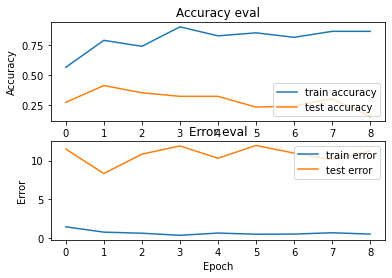

In [299]:
plot_history(mob_model)  # 200 epochs

In [36]:
test_set.class_indices

{'0 close': 0, '1 open': 1, '2 no_yawn': 2, '3 yawn': 3}

In [40]:
test_labels= test_set.classes
predictions= model.predict(x=test_set, verbose=0)

Confusion Matrix without normalisation
[[42  0  0  8]
 [44  0  0  6]
 [41  0  0  9]
 [43  0  0  7]]


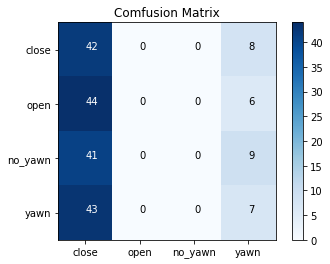

In [41]:
cm= confusion_matrix(y_true=test_labels, y_pred= predictions.argmax(axis=1))
plot_confusion_matrix(cm, classes=class_labels, title='Comfusion Matrix')

In [ ]:
#For last 23 layers opened; 30 epochs

In [75]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [76]:
x=mobile.layers[-6].output
output=Dense(units=4, activation='softmax')(x)

In [77]:
model=Model(inputs= mobile.input,outputs=output)

In [ ]:
for layer in model.layers[:-23]:     
    layer.trainable=False
model.summary()

Confusion Matrix without normalisation
[[162  31]
 [157  36]]


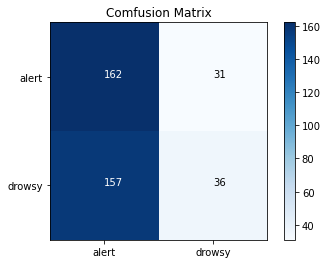

In [265]:
cm= confusion_matrix(y_true=test_labels, y_pred= predictions.argmax(axis=1)) 
plot_confusion_matrix(cm, classes=class_labels, title='Comfusion Matrix')

<Figure size 1440x720 with 0 Axes>

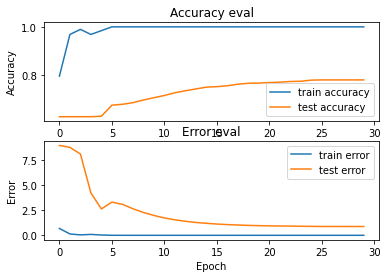

In [266]:
plot_history(mob_model)

### vGG16

In [42]:
vgg_train_set=ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, target_size=(224,224), batch_size=10)

vgg_valid_set=ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = valid_path, target_size=(224,224), batch_size=10)

vgg_test_set =ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, target_size=(224,224), batch_size=10)

Found 1075 images belonging to 2 classes.
Found 386 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


In [71]:
vgg16_model= tf.keras.applications.vgg16.VGG16()

In [72]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [78]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [79]:
model=Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [81]:
model.layers.pop()

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [83]:
for layer in model.layers[:-4]:
    layer.trainable=False

In [84]:
model.add(Dense(2, activation='softmax'))

In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Training the model

In [86]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True),
]

In [89]:
vgg_model= model.fit(x=train_set, validation_data=valid_set,steps_per_epoch=4, validation_steps=2, epochs=50, verbose=2, callbacks=callbacks)
#11.35-11.41

Epoch 1/50
4/4 - 15s - loss: 0.6762 - accuracy: 0.7250 - val_loss: 0.6694 - val_accuracy: 0.7000
Epoch 2/50
4/4 - 19s - loss: 0.6713 - accuracy: 0.7250 - val_loss: 0.6677 - val_accuracy: 0.7500
Epoch 3/50
4/4 - 14s - loss: 0.6779 - accuracy: 0.6500 - val_loss: 0.6723 - val_accuracy: 0.7000
Epoch 4/50

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
4/4 - 14s - loss: 0.6730 - accuracy: 0.7000 - val_loss: 0.6765 - val_accuracy: 0.6500
Epoch 5/50
4/4 - 21s - loss: 0.6698 - accuracy: 0.7250 - val_loss: 0.6724 - val_accuracy: 0.7000
Epoch 6/50
4/4 - 17s - loss: 0.6670 - accuracy: 0.7500 - val_loss: 0.6786 - val_accuracy: 0.6500
Epoch 7/50
4/4 - 15s - loss: 0.6698 - accuracy: 0.7250 - val_loss: 0.6866 - val_accuracy: 0.5500
Epoch 8/50
4/4 - 15s - loss: 0.6597 - accuracy: 0.8250 - val_loss: 0.7075 - val_accuracy: 0.3500
Epoch 9/50
4/4 - 13s - loss: 0.6755 - accuracy: 0.6750 - val_loss: 0.6819 - val_accuracy: 0.6000
Epoch 10/50

Epoch 00010: ReduceLROnPlateau re

### Prediction using VGG16

In [90]:
test_imgs, test_labels = next(test_set)
test_labels=test_labels[:,0]
test_labels

array([1., 1., 1., 0., 0., 0., 1., 1., 0., 1.], dtype=float32)

In [91]:
predictions=model.predict(test_set, steps=1, verbose=0)

In [92]:
cm=confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion Matrix without normalisation
[[0 4]
 [0 6]]


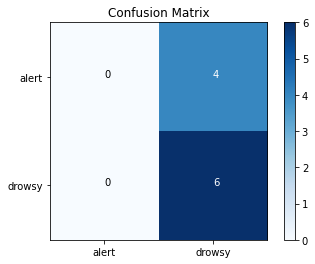

In [93]:
cm_plot_labels=['alert','drowsy']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

<Figure size 1440x720 with 0 Axes>

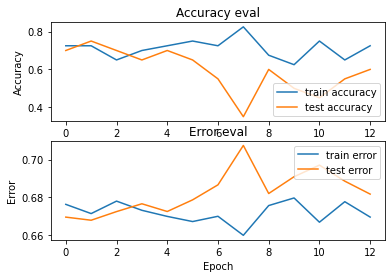

In [94]:
plot_history(vgg_model)

### CNN 

In [59]:
train_path, valid_path, test_path

('C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Datasets\\DD Data\\data-flair\\train',
 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Datasets\\DD Data\\data-flair\\valid',
 'C:\\Users\\hp\\Documents\\Data Science\\SEM 3\\Major Project\\Datasets\\DD Data\\data-flair\\test')

In [84]:
train_set=ImageDataGenerator().flow_from_directory(directory = train_path, target_size=(224,224), batch_size=8)

test_set = ImageDataGenerator().flow_from_directory(directory = test_path, target_size=(224,224), batch_size=4)

valid_set    = ImageDataGenerator().flow_from_directory(directory = valid_path, target_size=(224,224), batch_size=10)


Found 2865 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [67]:
imgs, labels=next(train_batches)

In [78]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (224,224,3)))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 64)      256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 55, 55, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 54, 54, 32)       

In [79]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [234]:
hist=model.fit(train_set, steps_per_epoch=4, validation_data=set, validation_steps=4, epochs=30, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 4 steps
Epoch 1/30
4/4 - 5s - loss: 1.5817 - accuracy: 0.3438 - val_loss: 3.1677 - val_accuracy: 0.5000
Epoch 2/30
4/4 - 4s - loss: 0.7750 - accuracy: 0.5938 - val_loss: 3.5344 - val_accuracy: 0.5000
Epoch 3/30
4/4 - 4s - loss: 0.5850 - accuracy: 0.7188 - val_loss: 3.0458 - val_accuracy: 0.5000
Epoch 4/30
4/4 - 4s - loss: 0.5486 - accuracy: 0.7812 - val_loss: 2.2629 - val_accuracy: 0.5000
Epoch 5/30
4/4 - 4s - loss: 0.2885 - accuracy: 0.8750 - val_loss: 1.6043 - val_accuracy: 0.5000
Epoch 6/30
4/4 - 4s - loss: 0.2998 - accuracy: 0.8438 - val_loss: 1.1501 - val_accuracy: 0.5000
Epoch 7/30
4/4 - 4s - loss: 0.3005 - accuracy: 0.9062 - val_loss: 0.9832 - val_accuracy: 0.5000
Epoch 8/30
4/4 - 4s - loss: 0.2230 - accuracy: 0.9375 - val_loss: 0.9124 - val_accuracy: 0.5000
Epoch 9/30
4/4 - 4s - loss: 0.2579 - accuracy: 0.8750 - val_loss: 0.8456 - val_accuracy: 0.5000
Epoch 10/30
4/4 - 5s - loss: 0.1341 - accuracy

In [235]:
test_imgs, test_labels = next(test_set)
test_labels=test_labels[:,0]
test_labels

array([1., 0., 1., 1., 1., 1., 0., 0., 1., 1.], dtype=float32)

In [236]:
predictions=model.predict(test_set, steps=1, verbose=0)

In [237]:
cm=confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion Matrix without normalisation
[[3 0]
 [7 0]]


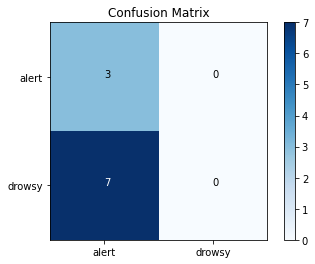

In [238]:
cm_plot_labels=['alert','drowsy']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

<Figure size 1440x720 with 0 Axes>

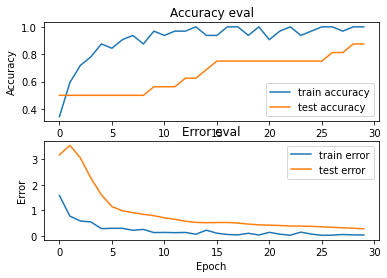

In [246]:
plot_history(hist)

In [ ]:
# to control the randomly fluctating accurcy(train and test), decreased the batch size i.e. increased the steps per epoch
# (https://www.researchgate.net/post/Why_is_my_training_loss_fluctuating)
# ideal lr value is 1e-4
# BN To Dropout in the mid conv layer decreased the random fluctuations